### Personal Notes
* Timedeltas
* Seaborn
* Longtitude, latitude plots

# Introduction
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# Stage 1: Questions and Goals
#### Stakeholders:  
 **Lily Moreno** : The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.  
 **Cyclistic marketing analytics team** : A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.  
 **Cyclistic executive team** : The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.  
#### Questions:
1. How annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual membership?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Stage 2: Prepare
**Data**: [click here](https://divvy-tripdata.s3.amazonaws.com/index.html)  
**Licence**: [click here](https://www.divvybikes.com/data-license-agreement)  
**Description**: The data contains raw information about the customers using Cyclistic services in 2019.  
**Problems**:  
* Some columns contain incorrect format
* Some columns contain empty cells  

All the problems will be handled during cleaning and the description will be provided in the stage 3.

# Stage 3: Cleaning
### 3.1 Uploading and processing the data
During this case study the common libraries will be used, namely `pandas` (working with data frames), `numpy` (data structures and math operations), `matplotlib` and `seaborn` (both for data visualization)

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

# Creating data frames
df1 = pd.read_csv('~/Downloads//cyclistic/202101-divvy-tripdata.csv')
df2 = pd.read_csv('~/Downloads//cyclistic/202102-divvy-tripdata.csv')
df3 = pd.read_csv('~/Downloads//cyclistic/202103-divvy-tripdata.csv')
df4 = pd.read_csv('~/Downloads//cyclistic/202104-divvy-tripdata.csv')
df5 = pd.read_csv('~/Downloads//cyclistic/202105-divvy-tripdata.csv')
df6 = pd.read_csv('~/Downloads//cyclistic/202106-divvy-tripdata.csv')
df7 = pd.read_csv('~/Downloads//cyclistic/202107-divvy-tripdata.csv')
df8 = pd.read_csv('~/Downloads//cyclistic/202108-divvy-tripdata.csv')

# Merging data frames (SQL-like union)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.reset_index(drop=True, inplace=True)
df.head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member


### 3.2 Handling empty values
The table below shows that the data frame contains cells in `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, and `end_lng` columns. Since I am not able to find the information about latitude and lontitude, the rows will be deleted. The information in the rest of the columns is not crucial, so the empty cells will be replaced with `0` and `Unknown` values.

In [2]:
# Visualization of empty rows
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    363133
start_station_id      363132
end_station_name      392390
end_station_id        392390
start_lat                  0
start_lng                  0
end_lat                 3357
end_lng                 3357
member_casual              0
dtype: int64

In [3]:
 # Filling the empty values
for i in df:
    if i in ['start_station_name', 'end_station_name']:
        df[i] = df[i].fillna('Unknown')
    elif i in ['start_station_id', 'end_station_id']:
        df[i] = df[i].fillna(0)
    elif i in ['end_lat', 'end_lng']:
        df.dropna(subset=['end_lat', 'end_lng'], inplace=True)

# Checking empty values after cleaning        
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### 3.3 Incorect data types
Columns `started_at` and `ended_at` represent timestamp during which the service was provided, however these columns have data type `string`. I am going to convert them to `datetime64` type.

In [4]:
# Existing data types
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
# Changing the data types
for i in df:
    if i in ['started_at', 'ended_at']:
        df[i] = pd.to_datetime(df[i])

# Checking data types after cleaning
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [6]:
# Total number of rows
df.count()[0]

3596815

# Stage 4: Analysis

1. How annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual membership?
3. How can Cyclistic use digital media to influence casual riders to become members?

* Bike type usage by usercount
* Mean travel time by user
* Mean travel distance by user
* Travel by day of week member/casual

### 4.1 Additional calculations
Following, I am going to calculate parameters that is not in the data frame, but will be very useful during the analysis process.  

Parameter `duration_minutes` is calculated by subtracting time when a ride was ended and starting time:

In [7]:
# Inserting a new column showing duration of a ride in minutes
duration = df['ended_at'] - df['started_at']
df.insert(4, 'duration_minutes', np.round(duration.dt.seconds/60, 1))

The new column `start_date` will be useful to represent changing overtime. Basically, I am going to change the format of the `started_at` parameter to a standart year-month-day type:

In [ ]:
# Inserting a new column showing a start date
start_date = pd.to_datetime(df['started_at']).dt.date
df.insert(2, 'start_date', start_date)
df['start_date'] = pd.to_datetime(df['start_date'])

Having latitude and longitude parameters allows to calculate the distance between starting point and destination by creating a custom function.
The result of the function will be represented in kilometers and can be checked [here](https://www.meridianoutpost.com/resources/etools/calculators/calculator-latitude-longitude-distance.php?).

In [8]:
# Create a function to calculate the distance between two points
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    
    return km

# Add new column with the distance between points
distance_km = haversine_np(df['start_lng'], df['start_lat'], df['end_lng'], df['end_lat'])
df.insert(10, 'distance_km', distance_km)

Identifying a day of a week according to `start_date` can be useful when visualizing the distribution of the rides between week days:

In [28]:
# Add weekday column
day_of_week = df['start_date'].dt.day_name()
df.insert(3, 'day_of_week', df['start_date'].dt.day_name())

Quick check the updated data frame and its data types:

In [35]:
# Quick check all new columns have been added
df.sample(5)

,ride_id,rideable_type,start_date,day_of_week,started_at,ended_at,duration_minutes,start_station_name,start_station_id,end_station_name,end_station_id,distance_km,start_lat,start_lng,end_lat,end_lng,member_casual
29921,85D2C7DC7431BF0F,electric_bike,2021-01-28,Thursday,2021-01-28 01:38:08,2021-01-28 01:44:25,6.3,Broadway & Sheridan Rd,13323,Clarendon Ave & Leland Ave,TA1307000119,1.673197,41.952842,-87.649960,41.967899,-87.649913,member
393744,29F18E0ED9DF0793,electric_bike,2021-04-29,Thursday,2021-04-29 21:24:14,2021-04-29 21:26:15,2.0,Unknown,0,Unknown,0,0.000000,41.800000,-87.600000,41.800000,-87.600000,member
3557164,6043BF56D452AE1C,electric_bike,2021-08-23,Monday,2021-08-23 18:09:37,2021-08-23 18:36:10,26.6,Western Ave & Walton St,KA1504000103,Lincoln Ave & Belle Plaine Ave,TA1309000026,6.435753,41.898440,-87.686509,41.956171,-87.680315,member
2592900,84FA069DFC6DFA7C,classic_bike,2021-07-11,Sunday,2021-07-11 23:01:23,2021-07-11 23:11:16,9.9,Clark St & Wellington Ave,TA1307000136,Sheffield Ave & Waveland Ave,TA1307000126,1.545801,41.936497,-87.647539,41.949399,-87.654529,member
2343206,99BA57C8124E6A0E,classic_bike,2021-07-02,Friday,2021-07-02 05:19:47,2021-07-02 05:26:54,7.1,Kingsbury St & Kinzie St,KA1503000043,Dearborn Pkwy & Delaware Pl,TA1307000128,1.299777,41.889177,-87.638506,41.898969,-87.629912,casual


In [30]:
# Quick check new columns
df.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
day_of_week                   object
started_at            datetime64[ns]
ended_at              datetime64[ns]
duration_minutes             float64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
distance_km                  float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### 4.2. Members vs. Casual
In the previous section, we determined that the number of rides between Jan - Aug 2021 is `3596815`. This number is destributed almost 50/50 between casual drivers and drivers with the subscription.

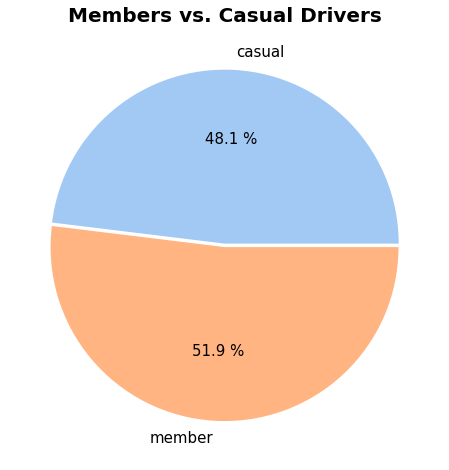

In [11]:
# Data frame grouped by driver type (count)
member = df.groupby('member_casual').count().reset_index(drop=False)[['member_casual', 'ride_id']]

# Parameters
values = [i for i in member['ride_id']]
labels = [j for j in member['member_casual']]
colors = sns.color_palette('pastel')[0:2]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct = '%.1f %%', explode=[0.01, 0.01], textprops={'fontsize': 15})

# Non-data parameters
plt.title('Members vs. Casual Drivers', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()

### Average or Mean? distance MEMBER vs. CASUAL

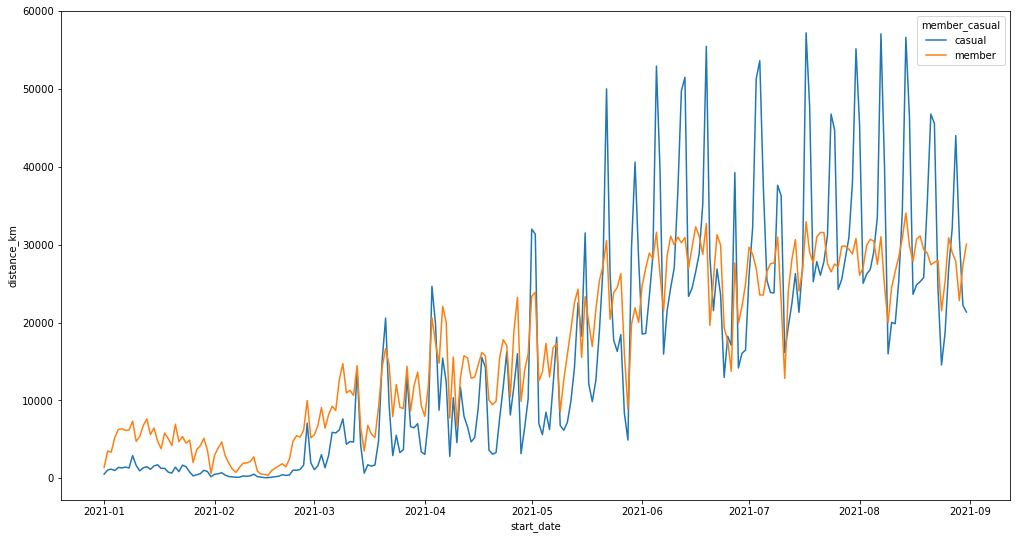

In [22]:
member_distance = df[['start_date', 'member_casual', 'distance_km']]
member_distance = member_distance.groupby(['start_date', 'member_casual']).sum()  # sum or mean?
member_distance.reset_index(drop=False, inplace=True)

plt.figure(figsize=(17, 9))

sns.lineplot(data=member_distance, x='start_date', y='distance_km', hue='member_casual')

plt.show()

In [21]:
# Casual AVG
df.loc[df['member_casual'] == 'casual', ['rideable_type', 'duration_minutes', 'distance_km']].groupby('rideable_type').mean()

,duration_minutes,distance_km
rideable_type,,
classic_bike,26.996922,2.146092
docked_bike,53.953003,1.964372
electric_bike,21.403561,2.540080


In [24]:
# Members AVG
df.loc[df['member_casual'] == 'member', ['rideable_type', 'duration_minutes', 'distance_km']].groupby('rideable_type').mean()

,duration_minutes,distance_km
rideable_type,,
classic_bike,14.238442,2.073615
docked_bike,2.600000,0.527623
electric_bike,13.787785,2.471133


In [25]:
# Casual AVG
df.loc[df['member_casual'] == 'casual', ['rideable_type', 'duration_minutes', 'distance_km']].groupby('rideable_type').count()

,duration_minutes,distance_km
rideable_type,,
classic_bike,911545,911545
docked_bike,241579,241579
electric_bike,575697,575697
